# Risky Business

Harold has been boasting about his recent cryptocurrency returns. He's even bet you five bucks that his trading algorithm has made his returns better than yours. Calculate the standard deviation and sharpe ratio for each your portfolios to determine which portfolio is the better investment based off of the greatest risk to reward ratio.

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

### Read in data

In [2]:
harold_portfolio_path = Path("../../Resources/harold_portfolio.csv")
my_portfolio_path = Path("../../Resources/my_portfolio.csv")

# Read in data
harold_portfolio = pd.read_csv(harold_portfolio_path, parse_dates=True, infer_datetime_format=True)
my_portfolio = pd.read_csv(my_portfolio_path, parse_dates=True, infer_datetime_format=True)

# Drop na
harold_portfolio = harold_portfolio.dropna()
my_portfolio = my_portfolio.dropna()

# Set Date as index
harold_portfolio = harold_portfolio.set_index('Date')
my_portfolio = my_portfolio.set_index('Date')

harold_portfolio.head()

,BTC,BTT,DOGE,ETH,LTC,XRP,SOLVE,XLM,TRON,ZIL
Date,,,,,,,,,,
2019-05-20,8118.39,0.001187,0.003041,261.09,95.06,0.398003,0.338667,0.135545,0.028509,0.017992
2019-05-19,8200.00,0.001056,0.003178,234.03,86.65,0.417700,0.300430,0.141485,0.029277,0.019170
2019-05-18,7262.40,0.000993,0.003005,244.59,89.88,0.372736,0.287630,0.128833,0.026823,0.017685
2019-05-17,7363.69,0.000957,0.002962,264.39,95.75,0.386193,0.259506,0.126562,0.027220,0.017892
2019-05-16,7878.96,0.000885,0.003168,249.00,102.26,0.419707,0.223316,0.137283,0.028857,0.018725


### Calculate daily returns 

In [3]:
# Calculate daily returns for each portfolio
harold_returns = harold_portfolio.pct_change().dropna()
my_returns = my_portfolio.pct_change().dropna()
harold_returns.head()

,BTC,BTT,DOGE,ETH,LTC,XRP,SOLVE,XLM,TRON,ZIL
Date,,,,,,,,,,
2019-05-19,0.010052,-0.110362,0.045051,-0.103642,-0.088470,0.049490,-0.112904,0.043823,0.026939,0.065474
2019-05-18,-0.114341,-0.059659,-0.054437,0.045122,0.037276,-0.107647,-0.042606,-0.089423,-0.083820,-0.077465
2019-05-17,0.013947,-0.036254,-0.014309,0.080952,0.065309,0.036103,-0.097778,-0.017627,0.014801,0.011705
2019-05-16,0.069974,-0.075235,0.069548,-0.058209,0.067990,0.086780,-0.139457,0.084709,0.060140,0.046557
2019-05-15,0.041168,-0.037288,0.044192,-0.126747,-0.103364,0.086484,0.007420,-0.002047,0.086322,0.088224


### `Concat` portfolios into one DataFrame

In [4]:
# Concat returns DataFrames
all_returns = pd.concat([harold_returns,my_returns], axis='columns', join='inner')
all_returns.head()

,BTC,BTT,DOGE,ETH,LTC,XRP,SOLVE,XLM,TRON,ZIL,BTC,DOGE,ETH,LTC,XRP,XLM
Date,,,,,,,,,,,,,,,,
2019-05-19,0.010052,-0.110362,0.045051,-0.103642,-0.088470,0.049490,-0.112904,0.043823,0.026939,0.065474,-0.114341,0.045051,-0.103642,-0.088470,0.049490,0.043823
2019-05-18,-0.114341,-0.059659,-0.054437,0.045122,0.037276,-0.107647,-0.042606,-0.089423,-0.083820,-0.077465,0.013947,-0.054437,0.045122,0.037276,-0.107647,-0.089423
2019-05-17,0.013947,-0.036254,-0.014309,0.080952,0.065309,0.036103,-0.097778,-0.017627,0.014801,0.011705,0.069974,-0.014309,0.080952,0.065309,0.036103,-0.017627
2019-05-16,0.069974,-0.075235,0.069548,-0.058209,0.067990,0.086780,-0.139457,0.084709,0.060140,0.046557,0.041168,0.069548,-0.058209,0.067990,0.086780,0.084709
2019-05-15,0.041168,-0.037288,0.044192,-0.126747,-0.103364,0.086484,0.007420,-0.002047,0.086322,0.088224,-0.025892,0.044192,-0.126747,-0.103364,0.086484,-0.002047


### Calculate `std dev` for all data

In [5]:
# Calculate std dev
all_portfolio_std = all_returns.std()
all_portfolio_std.head()

BTC     0.070488
BTT     0.030731
DOGE    0.050907
ETH     0.091517
LTC     0.084703
dtype: float64

### Calculate `sharpe ratio` for all data

In [6]:
# Calculate sharpe ratio
sharpe_ratios = (all_returns.mean() * 252) / (all_portfolio_std * np.sqrt(252))
sharpe_ratios.head()

BTC      0.936891
BTT    -32.935733
DOGE     5.615811
ETH     -5.638309
LTC     -0.796855
dtype: float64

### Plot Sharpe Ratios

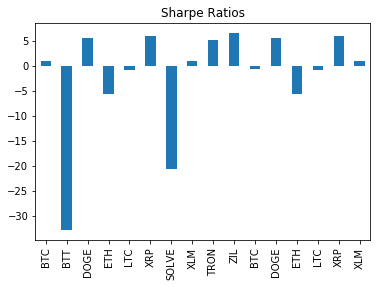

In [7]:
# Plot
sharpe_ratios.plot.bar(title='Sharpe Ratios')

### How many smart investments did Harold make compared to risky investments? How many did you make?

Out of his 10 investments, Harold only made 4 good investments. Out of the students' 6 investments, 3 of them were smart investments.

### Which cryptos have been the smartest investment?

DOGE, TRON, and XML have been the smartest crypto investments.